# Modelo de inteligência artificial para reconhecimento de escoamento

## 1. Carregar os dados

In [1325]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import os

In [1326]:
PastaPrincipal = '../Dados'
PastasSecundarias = os.listdir(PastaPrincipal)
# com_chapeu = 1
# sem_chapeu = 0
numero_de_classes = len(PastasSecundarias)
print(f'{numero_de_classes} Labels criadas: {PastasSecundarias}')


2 Labels criadas: ['0', '1']


## 2. Atribuindo cada labels para cada imagem

In [1327]:
imagens = []
labels = []
print('Importando as labels ...')
for label in PastasSecundarias:
    lista__de_imagens = os.listdir(PastaPrincipal + '/' + str(label))
    for imagem in lista__de_imagens:
        imagens_atual = cv2.imread(PastaPrincipal + '/' + str(label) + '/' + imagem)
        imagens_atual = cv2.resize(imagens_atual,(32,32))
        imagens.append(imagens_atual)
        labels.append(label)
    print(label, end=" ")



Importando as labels ...
0 1 

In [1328]:
print('Quantidade de imagens carregadas: ',len(imagens))
print('Quantidade de etiquetas carregadas: ',len(labels))


Quantidade de imagens carregadas:  210
Quantidade de etiquetas carregadas:  210


# 3. Convertendo as imagens para o formator array

In [1329]:
imagens = np.array(imagens)
labels = np.array(labels)
print('Medidas do vetor com todas as imagens reunidas: ',imagens.shape)
#Medidas do vetor com todas as imagens reunidas:  (210, 32, 32, 3)
# total de imagens = 210 
#tamanho de cada imagem = 32, 32 
# 3 significa a quantidade de canais de cores , nesse caso são 3 R,G e B
print('Medidas do vetor com todas as etiquetas reunidas: ',labels.shape)
#Medida do vetor com todas as etiquetas reunidas:  (210,)

Medidas do vetor com todas as imagens reunidas:  (210, 32, 32, 3)
Medidas do vetor com todas as etiquetas reunidas:  (210,)


# 4. Separação dos dados (treino, teste e validação)

In [1330]:
from sklearn.model_selection import train_test_split

In [1331]:
tamanho_do_teste = 0.2
tamanho_da_validacao = 0.2
X_treino,X_teste,y_treino,y_teste = train_test_split(imagens,labels,test_size= tamanho_do_teste)
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X_treino,y_treino,test_size= tamanho_da_validacao)

print('Vetor com todos os dados de treino: ',X_treino.shape, ' corresponde a 80 porcento de todo o dado bruto')

print('Vetor com todos os dados de teste: ',X_teste.shape, ' corresponde a 20 porcento de todo o dado bruto')

print('Vetor com todos os dados de validação: ',X_validacao.shape, ' corresponde a 20 porcento de todo o dado de treino')

Vetor com todos os dados de treino:  (134, 32, 32, 3)  corresponde a 80 porcento de todo o dado bruto
Vetor com todos os dados de teste:  (42, 32, 32, 3)  corresponde a 20 porcento de todo o dado bruto
Vetor com todos os dados de validação:  (34, 32, 32, 3)  corresponde a 20 porcento de todo o dado de treino


In [1332]:
# mostrar imagens
#image = plt.imshow(X_treino[0])

In [1333]:

def Visualizar_imagens(imagens, etiquetas):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.axis('off')
        plt.title(etiquetas[i])
        plt.imshow(imagens[i])
    
        

Dados de treino


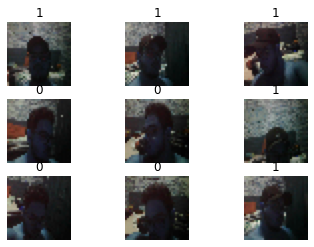

In [1334]:
print('Dados de treino')
Visualizar_imagens(X_treino,y_treino)

Dados de validação


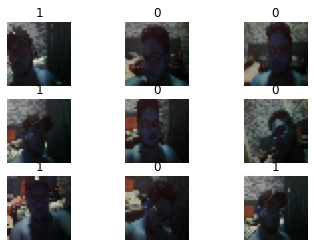

In [1335]:
print('Dados de validação')
Visualizar_imagens(X_validacao,y_validacao)

Dados de teste


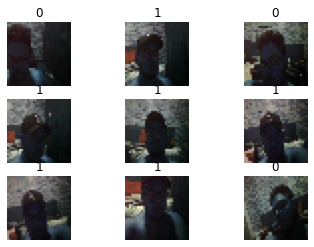

In [1336]:
print('Dados de teste')
Visualizar_imagens(X_teste,y_teste)

In [1337]:
# Consigo localizar o index de Cada "A" dentro de toda a lista
#print(np.where(y_treino=='sem_chapeu'))
index_das_amostras = []
for x in PastasSecundarias:
    index_das_amostras.append(len(np.where(y_treino==str(x))[0]))
print(index_das_amostras)

[65, 69]


# 5. Visualizando os dados

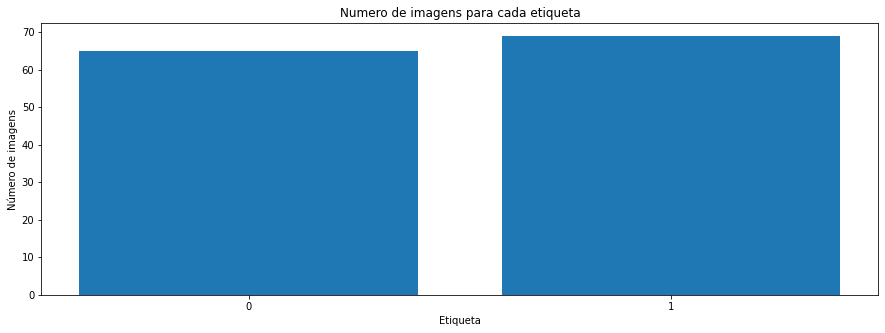

In [1338]:
plt.figure(figsize=(15,5))
plt.bar(PastasSecundarias,index_das_amostras)
plt.title('Numero de imagens para cada etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Número de imagens')
plt.show()

# 6. Pré processamento e tratamento das imagens

In [1339]:
def preProcessamento(img):
    #colocando em escala cinza
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # equalizando as imagens
    img = cv2.equalizeHist(img)
    # normalizando as imagens
    img = img /255
    return img

In [1340]:
X_treino = np.array(list(map(preProcessamento, X_treino)))
X_teste = np.array(list(map(preProcessamento, X_teste)))
X_validacao = np.array(list(map(preProcessamento, X_validacao)))
print('Dados pós processamento')
print('Dados de treino:',X_treino.shape)
print('Dados de teste: ',X_teste.shape)
print('Dados de validação: ',X_validacao.shape)


Dados pós processamento
Dados de treino: (134, 32, 32)
Dados de teste:  (42, 32, 32)
Dados de validação:  (34, 32, 32)


In [1341]:
# print('Dados de treino pré processados')
# Visualizar_imagens(X_teste,y_teste)
def imagens_processadas(imagens, etiquetas):

    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.axis('off')
        plt.title(etiquetas[i])
        plt.imshow(imagens[i])
    


In [1342]:
# Acrescentando uma profundidade nas imagens 
# Esse passo é somente necessário para a aplicação da rede neural
#print(X_treino.shape) #(52828, 32, 32)
X_treino = X_treino.reshape(X_treino.shape[0],X_treino.shape[1],X_treino.shape[2],1)
X_teste = X_teste.reshape(X_teste.shape[0],X_teste.shape[1],X_teste.shape[2],1)
X_validacao = X_validacao.reshape(X_validacao.shape[0],X_validacao.shape[1],X_validacao.shape[2],1)
#print(X_treino.shape) #(52828, 32, 32, 1)

Imagens de treino pré processadas


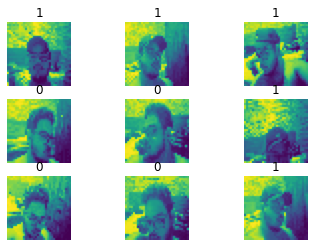

In [1343]:
print('Imagens de treino pré processadas')
imagens_processadas(X_treino,y_treino)

Imagens de teste pré processadas


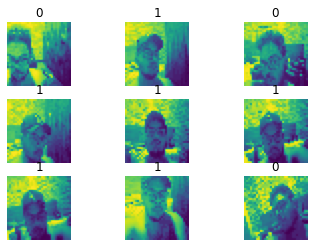

In [1344]:
print('Imagens de teste pré processadas')
imagens_processadas(X_teste,y_teste)

Imagens de validação pré processadas


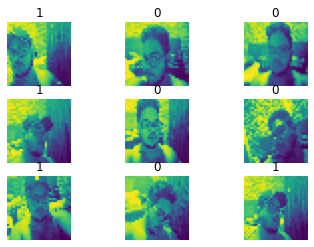

In [1345]:
print('Imagens de validação pré processadas')
imagens_processadas(X_validacao,y_validacao)

# 7. Aumentando as imagens

In [1346]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [1347]:
dataGen = ImageDataGenerator(width_shift_range=0.1, 
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
dataGen.fit(X_treino)


In [1348]:
y_treino = tf.keras.utils.to_categorical(y_treino,num_classes=numero_de_classes)
y_teste = tf.keras.utils.to_categorical(y_teste,num_classes=numero_de_classes)
y_validacao = tf.keras.utils.to_categorical(y_validacao,num_classes=numero_de_classes)

# 8. Desenvolvendo a rede neural

In [1349]:
dimensao_imagem = (32,32,3)
def meuModelo():
    num_filtros = 60
    tamanho_do_filtro1 = (5,5)
    tamanho_do_filtro2 = (3,3)
    tamanho_do_pool = (2,2)
    numero_do_nodes = 500

    modelo = Sequential()
    modelo.add(layers.Conv2D(num_filtros,tamanho_do_filtro1,input_shape=(dimensao_imagem[0],dimensao_imagem[1],1),activation='relu')) 
    modelo.add(layers.Conv2D(num_filtros,tamanho_do_filtro1,activation='relu'))
    modelo.add(layers.MaxPooling2D(pool_size=tamanho_do_pool)) 
    modelo.add(layers.Conv2D(num_filtros//2,tamanho_do_filtro2,activation='relu'))
    modelo.add(layers.Conv2D(num_filtros//2,tamanho_do_filtro2,activation='relu'))
    modelo.add(layers.MaxPooling2D(pool_size=tamanho_do_pool)) 
    modelo.add(layers.Dropout(0.5))
    modelo.add(layers.Flatten())
    modelo.add(layers.Dense(numero_do_nodes,activation='relu'))
    modelo.add(layers.Dropout(0.5))
    modelo.add(layers.Dense(numero_de_classes,activation="softmax"))
    modelo.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return modelo

In [1350]:
modelo = meuModelo()
print(modelo.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                 

# 9. Treinando o modelo

In [1351]:
batchSizeVal = 50
epochsVal = 30
stepsPerEpochs = 6000
history= modelo.fit(dataGen.flow(X_treino,y_treino,batch_size=batchSizeVal),epochs=epochsVal,validation_data=(X_validacao,y_validacao),shuffle=1)

Epoch 1/30
3/3 [==============================] - 1s 134ms/step - loss: 0.6999 - accuracy: 0.4552 - val_loss: 0.6963 - val_accuracy: 0.3824
Epoch 2/30
3/3 [==============================] - 0s 86ms/step - loss: 0.6794 - accuracy: 0.5746 - val_loss: 0.7153 - val_accuracy: 0.3824
Epoch 3/30
3/3 [==============================] - 0s 101ms/step - loss: 0.7282 - accuracy: 0.5522 - val_loss: 0.6965 - val_accuracy: 0.3824
Epoch 4/30
3/3 [==============================] - 0s 98ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6629 - val_accuracy: 0.7353
Epoch 5/30
3/3 [==============================] - 0s 94ms/step - loss: 0.6820 - accuracy: 0.6343 - val_loss: 0.6604 - val_accuracy: 0.7353
Epoch 6/30
3/3 [==============================] - 0s 87ms/step - loss: 0.6816 - accuracy: 0.5597 - val_loss: 0.6608 - val_accuracy: 0.8235
Epoch 7/30
3/3 [==============================] - 0s 87ms/step - loss: 0.6613 - accuracy: 0.6194 - val_loss: 0.6404 - val_accuracy: 0.7941
Epoch 8/30
3/3 [=========

# 10. Resultado do treino 

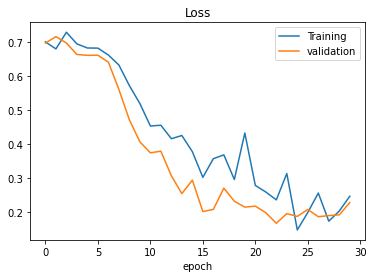

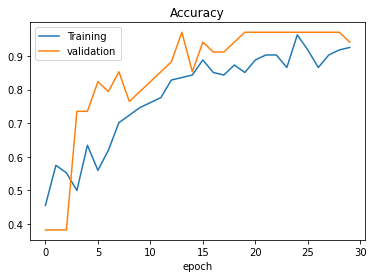

Test score =  0.1233418881893158
Test accuracy =  0.976190447807312


In [1352]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()
score = modelo.evaluate(X_teste,y_teste, verbose=0)
print('Test score = ',score[0])
print('Test accuracy = ',score[1])

# 11. Salvando o modelo

In [1353]:
import os.path

In [1354]:
if os.path.isfile('m_treinado.h5') is False:
    modelo.save('m_treinado.h5')